# CM4 Héritage

En programmation orientée objet, le verbe “hériter” signifie “avoir également accès à”. Lorsqu’on dit qu’un objet “hérite” des méthodes de la classe qui l’a défini, cela signifie que l’objet peut utiliser ces méthodes,  qu’il y a accès.

La **notion d’héritage** est au coeur de la programmation orientée objet. L'héritage peur se faire entre deux classes : nous allons pouvoir créer des **sous-classes** ou des classes “enfants” à partir de classes de base ou classes “parentes”.

### Exemple

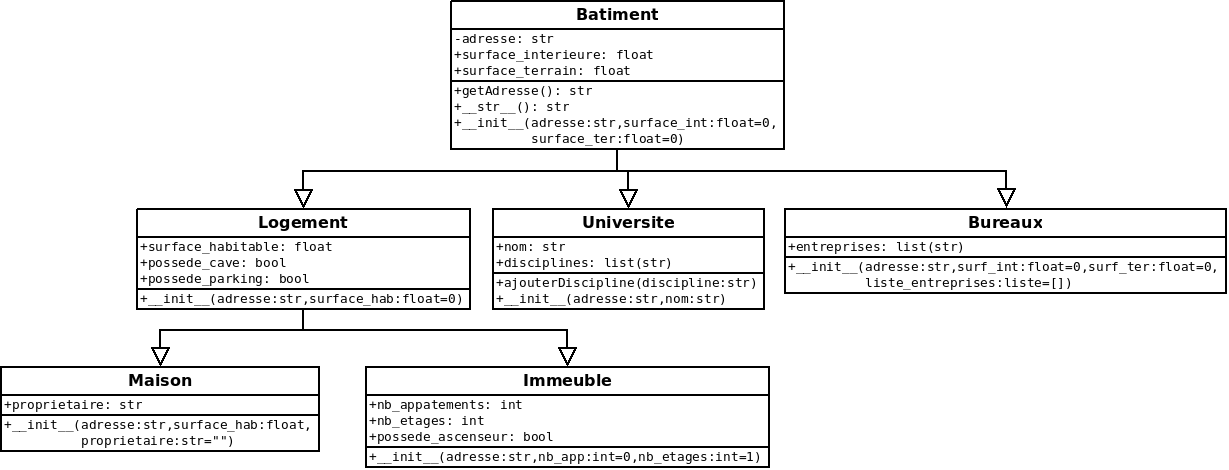

In [1]:
class Batiment:
    def __init__(self, adresse, s_int=0, s_ter=0):
        self.__adresse = adresse
        self.surface_interieure = s_int
        self.surface_exterieure = s_ter

    def getAdresse(self):
        return self.__adresse

    def __str__(self):
        # exemple qui permet d'afficher le nom de la classe :
        nom_classe = self.__class__.__name__
        
        return nom_classe + " : " + self.__adresse + " " + str(self.surface_interieure) + "m2"

In [2]:
# declaration de la classe enfant : 
class Bureaux(Batiment):
    def __init__(self, adresse, s_int=0, s_ter=0, liste_ent = []):
        # appel au constructeur du parent :
        super().__init__(adresse, s_int, s_ter)
        
        # suite du constructeur pour Bureaux :
        self.entreprises = liste_ent

In [3]:
# Exemples d'instances :
bat = Batiment("1 rue Megevand 25000 Besançon", 100, 200)
print(bat)
print(bat.surface_interieure)

banque_pop = Bureaux("1 pl. de la 1e Armée Fr. 25000 Besançon", 1000)
print(banque_pop)

# L'objet hérite toutes les attributs et méthodes de la classe parent :
print(banque_pop.getAdresse())
print(banque_pop.surface_interieure)


Batiment : 1 rue Megevand 25000 Besançon 100m2
100
Bureaux : 1 pl. de la 1e Armée Fr. 25000 Besançon 1000m2
1 pl. de la 1e Armée Fr. 25000 Besançon
1000


In [4]:
class Universite(Batiment):
    def __init__(self, adresse, nom):
        super().__init__(adresse)
        self.nom = nom
        self.disciplines = []

    def ajouterDiscipline(self, discipline):
        self.disciplines.append(discipline)



In [5]:
# Exemples d'instances :
slhs = Universite("30 rue Megevand", "UFC SLHS")
slhs.ajouterDiscipline("Langues")
slhs.surface_interieure = 2000
print(slhs)
print(slhs.disciplines)


Universite : 30 rue Megevand 2000m2
['Langues']


In [7]:
class Logement(Batiment):
    def __init__(self, adresse, sur_hab = 0):
        super().__init__(adresse, sur_hab)
        
        self.surface_habitable = sur_hab
        self.possede_cave = False
        self.possede_parking = False

In [8]:
# declaration des enfants de Logement
class Maison(Logement):
    def __init__(self, adresse, sur_hab, proprietaire=""):
        super().__init__(adresse, sur_hab)
        self.proprietaire = proprietaire
        
    # on peut redefinir certaines methodes
    def getAdresse(self):
        return self.proprietaire + "\n" + super().getAdresse()
        
class Immeuble(Logement):
    def __init__(self, adresse, nb_app=0, nb_etages=1):
        super().__init__(adresse)
        self.nb_appartements = nb_app
        self.nb_etages = nb_etages
        self.possede_ascenseur = False

In [9]:
# Exemples d'instances 
imm = Immeuble("13 rue Ronchaux 25000")
# un Immeuble herite de Logement et de Batiment :
print(imm.possede_parking)
print(imm)

m = Maison("14 rue Ronchaux 25000", 120, "M. Dupont")
print(m)
print(m.getAdresse())

False
Immeuble : 13 rue Ronchaux 25000 0m2
Maison : 14 rue Ronchaux 25000 120m2
M. Dupont
14 rue Ronchaux 25000


### L'exemple autour du vocabulaire

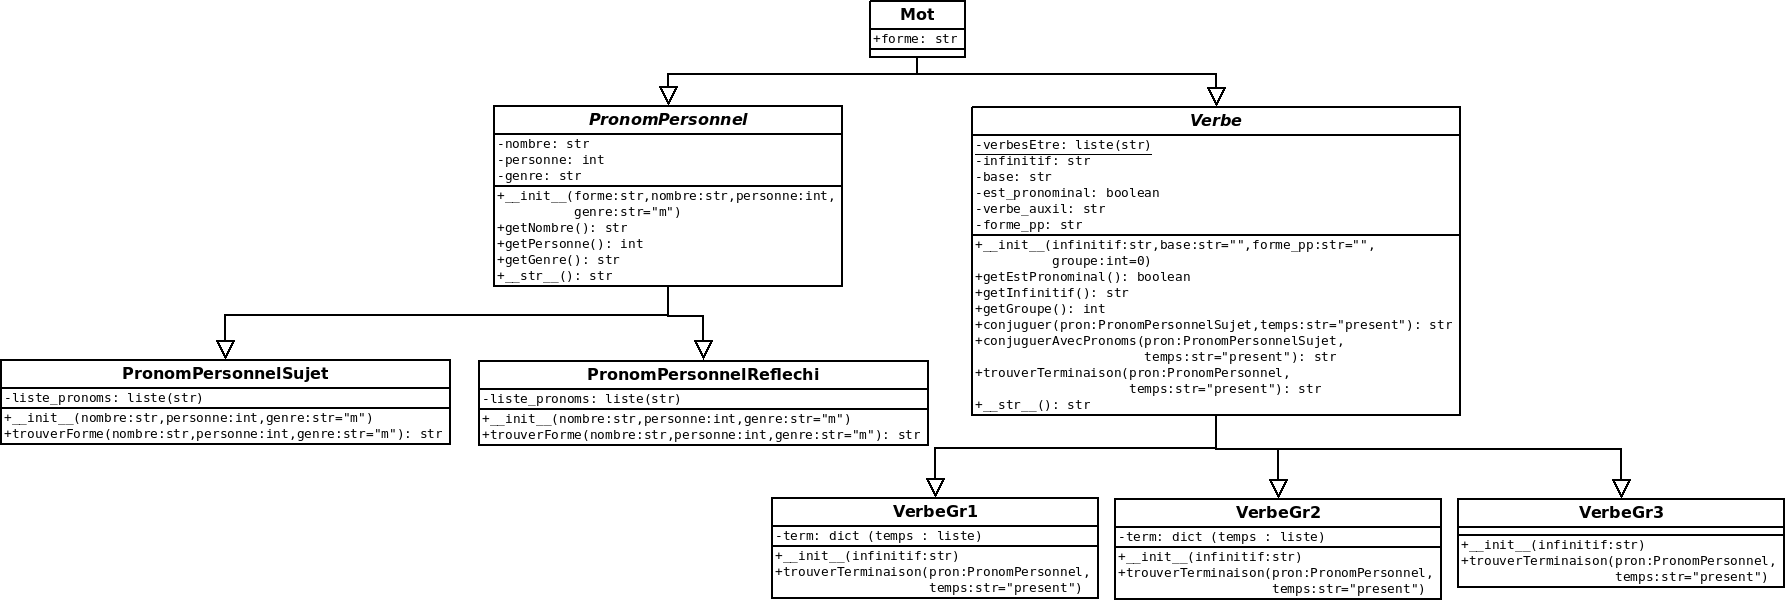

- Les verbes et les pronoms personnels sont tous des mots
- Nous prendrons en compte le fait que les pronoms personnels en français sont de différents types (sujet, refléchis, COD, COI, ...) - voir le tableau ici : https://www.podcastfrancaisfacile.com/grammaire/pronoms-personnels-tableau-recapitulatif.html
- Un verbe peut être de 1e, 2e ou 3e groupe

Avantages : des classes plus courtes et lisibles.

Pour simplifier la suite, nous allons nous passer d'une partie des setters qui avaient été définis.

In [10]:
class Mot :
    def __init__(self, forme):
        self.forme = forme  # public !

In [11]:
class PronomPersonnel(Mot) :
               
    # constructeur
    def __init__(self, forme, nombre, personne, genre="m"):
        # toujours commencer par un appel au super-contructeur
        super().__init__(forme)
        
        # verification de la validite des donnees :
        if nombre not in ["sg", "pl"] or personne not in [1,2,3] or genre not in ["m", "f", "n"]:
            print("Erreur ! Appel à PronomPersonnel avec arguments invalides.")
            return
        
        self.__nombre = nombre
        self.__personne = personne
        self.__genre = genre
    
    def getNombre(self):
        return self.__nombre
    
    def getPersonne(self):
        return self.__personne
    
    def getGenre(self):
        return self.__genre
                     
    # conversion en str (commun a toutes les sous-classes)
    def __str__(self):
       # return self.forme + " (" + self.__nombre + "," + str(self.__personne) + self.__genre + ")"
       return self.forme

In [12]:
class PronomPersonnelSujet(PronomPersonnel) :
    # liste de pronoms
    __liste_pronoms = ["je", "tu", ["il", "elle", "on"], "nous", "vous", ["ils", "elles"] ]
    
    # une methode pour retrouver la forme d'un pronom a partir de la liste de pronoms
    # cette methode sera utilisee dans le constructeur
    @staticmethod
    def trouverForme(nombre, personne, genre="m") :
        forme = ""
        if nombre == "sg" : 
            forme = PronomPersonnelSujet.__liste_pronoms[personne-1]
        else : 
            forme = PronomPersonnelSujet.__liste_pronoms[personne+2]

        if personne == 3 :
            if genre == "m": 
                forme = forme[0]
            elif genre == "n" and nombre == "sg" : 
                forme = forme[2]
            else :
                forme = forme[1]

        return forme
    
    # redefinition du constructeur
    def __init__(self, nombre, personne, genre="m"):
        
        forme = PronomPersonnelSujet.trouverForme(nombre, personne, genre)
        super().__init__(forme, nombre, personne, genre)

In [13]:
class PronomPersonnelReflechi(PronomPersonnel) :
    # liste de pronoms
    __liste_pronoms = ["me", "te", "se", "nous", "vous", "se" ]
    
    # une methode pour retrouver la forme d'un pronom a partir de la liste de pronoms
    # cette methode sera utilisee dans le constructeur
    @staticmethod
    def trouverForme(nombre, personne, genre="m") :
        forme = ""
        if nombre == "sg" : 
            forme = PronomPersonnelReflechi.__liste_pronoms[personne-1]
        else : 
            forme = PronomPersonnelReflechi.__liste_pronoms[personne+2]

        return forme
    
    # redefinition du constructeur
    def __init__(self, nombre, personne, genre="m"):
        forme = PronomPersonnelReflechi.trouverForme(nombre, personne, genre)
        super().__init__(forme, nombre, personne, genre)

In [14]:
elle = PronomPersonnelSujet("sg", 3, "f")
print(elle)

se = PronomPersonnelReflechi("sg", 3, "f")
print(se)

elle
se


In [20]:
class Verbe(Mot):
    
    __verbesEtre = ["aller", "venir", "entrer", "sortir", "monter", "descendre", 
                  "tomber", "rester", "naître", "mourir", "arriver", "partir"]
            
    def __init__(self, infinitif, base = "", forme_pp = "", groupe = 0):
        super().__init__(infinitif)
        self.__infinitif = infinitif
        self.__base = base
        self.__forme_pp = forme_pp
        self.__groupe = groupe

        self.__est_pronominal = False
        if infinitif.startswith("se ") or infinitif.startswith("s'"):
            self.__est_pronominal = True
        
        self.__verbe_auxil = "avoir"
        if self.__est_pronominal or self.__infinitif in Verbe.__verbesEtre:
            self.__verbe_auxil = "être"
            
            
    def getEstPronominal(self):
        return self.__est_pronominal
    
    def getInfinitif(self):
        return self.__infinitif
    
    def getGroupe(self):
        return self.__groupe
    
    def __str__(self) :
        return self.__infinitif + " : " + self.__base + " " + str(self.__groupe)
    
    # Conjugaison avec un PronomPersonnelSujet
    # retourne uniquement la forme du verbe
    def conjuguer(self, pron, temps='present') :

        if temps in ["present", "imparfait", "futur", "cond_present"] :

            if self.__est_pronominal :
                forme_pp = self.__base.replace("se ", "")
                forme_pp = forme_pp.replace("s'", "")
                
                # produire le pronom reflechi :
                pron_refl = PronomPersonnelReflechi(pron.getNombre(), pron.getPersonne(), pron.getGenre())
                return str(pron_refl) + " " +  forme_pp + self.trouverTerminaison(pron, temps)

            else:

                return self.__base + self.trouverTerminaison(pron, temps)
    
        if temps=="passe_compose" :
            # etre et avoir sont deux verbes du troisième groupe
            # on crée donc une instance de VerbeGr3, qui aura pour valeur l'auxiliaire
            # du verbe que l'on manipule (ex : penser)
            # creer le verbe auxiliaire de 3 groupe, qui sera ensuite conjugue :
            v_aux = VerbeGr3(self.__verbe_auxil)
            v_aux_present = v_aux.conjuguer(pron, "present")
            
            if self.__est_pronominal :
                forme_pp = self.__forme_pp.replace("se ", "")
                forme_pp = forme_pp.replace("s'", "")

                # produire le pronom reflechi :
                pron_refl = PronomPersonnelReflechi(pron.getNombre(), pron.getPersonne(), pron.getGenre())
                forme_conjuguee = str(pron_refl) + " " + v_aux_present + " " + forme_pp
                
            else :           
                forme_conjuguee = v_aux_present + " " + self.__forme_pp
            
            # gerer l'accord du participe passe :
            if pron.getGenre() == "f" and self.__verbe_auxil == "être" :
                forme_conjuguee += "e"

            if pron.getNombre() == "pl" and self.__verbe_auxil == "être" :
                forme_conjuguee += "s"    
                
            return forme_conjuguee
                
        return "[forme inconnue]"
    
    # Conjugaison avec un PronomPersonnelSujet
    # retourne le pronom + forme du verbe
    def conjuguerAvecPronom(self, pron, temps='present') :     
        conjugaison = self.conjuguer(pron, temps)
        return pron.forme + " " + conjugaison

    
    # Une méthode pour trouver la bonne terminaison pour la conjugaison
    # Elle sera re-definie dans les sous-classes
    def trouverTerminaison(self, pron, temps = "present"):
        pass        


In [18]:
class VerbeGr1(Verbe) :

    # listes de terminaisons
    __term = {
            "present" : ["e", "es", "e", "ons", "ez", "ent"], 
            "imparfait" : ["ais", "ais", "ait", "ions", "iez", "aient"],
            "futur" : ["erai", "eras", "era", "erons", "erez", "eront"],
            "cond_present" : ["erais", "erais", "erait", "erions", "eriez", "eraient"]
        }

    def __init__(self, infinitif):
        base = infinitif[0:-2]
        forme_pp = base + "é"
        super().__init__(infinitif, base, forme_pp, 1)
        

    def trouverTerminaison(self, pron, temps = "present"):
        # trouver l'indice de la terminaison qui nous interesse :
        indice = pron.getPersonne() - 1
        if pron.getNombre() == "pl" : 
            indice = pron.getPersonne() + 2
        # trouver la terminaisons a partir des listes :
        return VerbeGr1.__term[temps][indice]

In [96]:
class VerbeGr2(Verbe) :
        
    # listes de terminaisons
    __term = {
                "present" : ["is", "is", "it", "issons", "issez", "issent"], 
                "imparfait" : ["issais", "issais", "issait", "issions", "issiez", "issaient"],
                "futur" :  ["irai", "iras", "ira", "irons", "irez", "iront"],
                "cond_present" : ["irais", "irais", "irait", "irions", "iriez", "iraient"]
            }
    
    def __init__(self, infinitif):
        base = infinitif[0:-2]
        forme_pp = base + "i"
        super().__init__(infinitif, base, forme_pp, 2)

    def trouverTerminaison(self, pron, temps = "present"):
        # trouver l'indice de la terminaison qui nous interesse :
        indice = pron.getPersonne() - 1
        if pron.getNombre() == "pl" : 
            indice = pron.getPersonne() + 2
        # trouver la terminaisons a partir des listes :
        return VerbeGr2.__term[temps][indice]

In [16]:
class VerbeGr3(Verbe) :

        
    # listes de terminaisons
    __avoir_present = ["ai", "as", "a", "avons", "avez", "ont"]
    __etre_present = ["suis", "es", "est", "sommes", "êtes", "sont"]


    def __init__(self, infinitif):
        if infinitif == "être" :
            super().__init__(infinitif, "", "été", 3)

        elif infinitif == "avoir" :
            super().__init__(infinitif, "", "eu", 3)
            
        else :
            super().__init__(infinitif, "", "", 3)

    def trouverTerminaison(self, pron, temps = "present"):
        # trouver l'indice de la terminaison qui nous interesse :
        indice = pron.getPersonne() - 1
        if pron.getNombre() == "pl" : 
            indice = pron.getPersonne() + 2
            
        if self.getInfinitif() == "avoir" :
            return VerbeGr3.__avoir_present[indice]
            
        if self.getInfinitif() == "être" :
            return VerbeGr3.__etre_present[indice]

NameError: name 'Verbe' is not defined

In [15]:
elle = PronomPersonnelSujet("sg", 3, "f")
print(elle)

se = PronomPersonnelReflechi("sg", 3, "f")
print(se)

penser = VerbeGr1("penser")
print(penser)

elle
se


NameError: name 'VerbeGr1' is not defined

In [99]:
print(penser.conjuguer(elle, "passe_compose"))
print(penser.conjuguerAvecPronom(elle, "passe_compose"))

a pensé
elle a pensé


### Exercices

1. Produisez les conjugaisons pour les verbes :

    - marcher, rester, se laver, s'aimer, finir, bâtir, partir, appeler

pour tous les pronoms et pour les temps : _present, imparfait, futur et passé composé_.

Utilisez des boucles pour créer tous ces objets.


2. Trouvez un moyen de corriger la contraction "j'", "s'", "m'" avant les verbes qui commencent par une voyelle.